In [9]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [11]:
inventory_core = pd.read_csv('../heatherkayb_capstone/data/RDC_Inventory_Core_Metrics_Zip_History.csv')

In [12]:
inventory_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864853 entries, 0 to 1864852
Data columns (total 40 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   month_date_yyyymm                        int64  
 1   postal_code                              int64  
 2   zip_name                                 object 
 3   median_listing_price                     float64
 4   median_listing_price_mm                  float64
 5   median_listing_price_yy                  float64
 6   active_listing_count                     float64
 7   active_listing_count_mm                  float64
 8   active_listing_count_yy                  float64
 9   median_days_on_market                    float64
 10  median_days_on_market_mm                 float64
 11  median_days_on_market_yy                 float64
 12  new_listing_count                        float64
 13  new_listing_count_mm                     float64
 14  new_listing_count_

In [20]:
inventory_core.postal_code.unique()

array([17572, 60083, 32461, ..., 33927, 44648, 75849], dtype=int64)

In [29]:
zips = [37201, 37203, 37204, 37205, 37206, 37027, 37208, 37209, 37210, 37211, 37212, 37214, 37215, 37216, 37217, 37218, 37219, 37220, 37221, 37228, 37013, 37072, 37076, 37115, 37138]
core_zips = inventory_core.loc[inventory_core['postal_code'].isin(zips)]
core_zips

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
1790,202203,37072,"goodlettsville, tn",614450.0,0.1224,0.9642,12.0,-0.0769,-0.5556,13.0,...,767000.0,0.3083,0.7541,32.0,0.0667,-0.4074,1.5833,0.2756,0.5833,1.0
1801,202203,37217,"nashville, tn",309450.0,0.2358,0.1465,33.0,0.1786,0.2222,26.0,...,314577.0,0.0424,0.1240,88.0,0.2571,0.4915,1.5152,0.0509,0.3300,1.0
2919,202203,37220,"nashville, tn",1595000.0,0.0000,0.1193,2.0,1.0000,-0.8462,61.0,...,1227067.0,0.1468,-0.3524,2.0,0.0000,-0.9231,0.0000,-1.0000,-1.0769,1.0
4671,202203,37214,"nashville, tn",364900.0,0.1677,0.1679,12.0,0.5000,-0.4783,4.0,...,358377.0,-0.0316,0.0050,29.0,0.0741,-0.5167,1.4167,-0.9583,-0.1051,1.0
4677,202203,37218,"nashville, tn",447403.0,-0.0469,0.4550,8.0,-0.3846,-0.5294,20.0,...,476435.0,0.0156,0.5122,79.0,0.0128,1.0256,8.7500,3.7500,7.2794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821481,201609,37206,"nashville, tn",419900.0,NaN,NaN,264.0,NaN,NaN,32.0,...,422674.0,NaN,NaN,265.0,NaN,NaN,0.0038,NaN,NaN,NaN
1834865,201608,37206,"nashville, tn",412400.0,NaN,NaN,241.0,NaN,NaN,33.0,...,418469.0,NaN,NaN,242.0,NaN,NaN,0.0041,NaN,NaN,NaN
1843082,201608,37072,"goodlettsville, tn",247400.0,NaN,NaN,127.0,NaN,NaN,38.0,...,329903.0,NaN,NaN,128.0,NaN,NaN,0.0079,NaN,NaN,NaN
1861004,201607,37072,"goodlettsville, tn",239900.0,NaN,NaN,131.0,NaN,NaN,32.0,...,330211.0,NaN,NaN,132.0,NaN,NaN,0.0076,NaN,NaN,NaN


In [55]:
zip1 = [37027]
zip_37027 = inventory_core.loc[inventory_core['postal_code'].isin(zip)]
zip_37027

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
11146,202203,37221,"nashville, tn",524950.0,-0.1829,0.4787,21.0,0.0000,-0.3438,4.0,...,717129.0,0.0443,0.5466,71.0,-0.1125,-0.2604,2.3810,-0.4286,0.3810,1.0
47542,202202,37221,"nashville, tn",642450.0,0.4277,0.8624,21.0,-0.0870,-0.3000,12.0,...,686715.0,0.0874,0.5235,80.0,-0.0476,-0.1209,2.8095,0.3313,0.7429,1.0
66238,202201,37221,"nashville, tn",450000.0,-0.1254,0.3850,23.0,-0.5208,-0.4524,32.0,...,631532.0,-0.5995,0.5348,84.0,-0.2294,-0.2500,2.4783,1.2074,0.8116,1.0
95409,202112,37221,"nashville, tn",514500.0,0.0786,0.5226,48.0,0.1707,-0.2615,24.0,...,1576907.0,-0.0254,2.8735,109.0,0.0187,-0.2685,1.2708,-0.3145,0.0401,1.0
126707,202111,37221,"nashville, tn",477000.0,-0.1198,0.4034,41.0,-0.2545,-0.5287,17.0,...,1617928.0,0.1536,2.8649,107.0,-0.0932,-0.3706,1.5854,0.4035,0.6198,1.0
160872,202110,37221,"nashville, tn",541900.0,0.1755,0.5943,55.0,0.2222,-0.3956,21.0,...,1402518.0,0.0273,2.1513,118.0,0.0826,-0.3481,1.1818,-0.2182,0.2038,1.0
184347,202109,37221,"nashville, tn",461000.0,-0.0365,0.4297,45.0,0.0227,-0.4706,14.0,...,1365234.0,-0.0546,2.4518,109.0,-0.0268,-0.3736,1.4000,-0.1455,0.3294,1.0
195271,202108,37221,"nashville, tn",478450.0,0.0414,0.3294,44.0,0.0476,-0.5510,14.0,...,1444124.0,-0.0131,2.1324,112.0,0.0667,-0.4043,1.5455,-0.0022,0.6169,1.0
240275,202107,37221,"nashville, tn",459450.0,0.0395,0.1781,42.0,0.2727,-0.4878,10.0,...,1463276.0,-0.0466,1.7594,105.0,0.0396,-0.4324,1.5476,-0.4827,0.3159,0.0
272173,202106,37221,"nashville, tn",442000.0,0.0400,0.1121,33.0,-0.0294,-0.6024,7.0,...,1534738.0,1.9665,1.7470,101.0,0.0521,-0.4326,2.0303,0.2068,0.9219,1.0


In [56]:
zip2 = [37221]
zip_37221 = inventory_core.loc[inventory_core['postal_code'].isin(zip)]
zip_37221

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
11146,202203,37221,"nashville, tn",524950.0,-0.1829,0.4787,21.0,0.0000,-0.3438,4.0,...,717129.0,0.0443,0.5466,71.0,-0.1125,-0.2604,2.3810,-0.4286,0.3810,1.0
47542,202202,37221,"nashville, tn",642450.0,0.4277,0.8624,21.0,-0.0870,-0.3000,12.0,...,686715.0,0.0874,0.5235,80.0,-0.0476,-0.1209,2.8095,0.3313,0.7429,1.0
66238,202201,37221,"nashville, tn",450000.0,-0.1254,0.3850,23.0,-0.5208,-0.4524,32.0,...,631532.0,-0.5995,0.5348,84.0,-0.2294,-0.2500,2.4783,1.2074,0.8116,1.0
95409,202112,37221,"nashville, tn",514500.0,0.0786,0.5226,48.0,0.1707,-0.2615,24.0,...,1576907.0,-0.0254,2.8735,109.0,0.0187,-0.2685,1.2708,-0.3145,0.0401,1.0
126707,202111,37221,"nashville, tn",477000.0,-0.1198,0.4034,41.0,-0.2545,-0.5287,17.0,...,1617928.0,0.1536,2.8649,107.0,-0.0932,-0.3706,1.5854,0.4035,0.6198,1.0
160872,202110,37221,"nashville, tn",541900.0,0.1755,0.5943,55.0,0.2222,-0.3956,21.0,...,1402518.0,0.0273,2.1513,118.0,0.0826,-0.3481,1.1818,-0.2182,0.2038,1.0
184347,202109,37221,"nashville, tn",461000.0,-0.0365,0.4297,45.0,0.0227,-0.4706,14.0,...,1365234.0,-0.0546,2.4518,109.0,-0.0268,-0.3736,1.4000,-0.1455,0.3294,1.0
195271,202108,37221,"nashville, tn",478450.0,0.0414,0.3294,44.0,0.0476,-0.5510,14.0,...,1444124.0,-0.0131,2.1324,112.0,0.0667,-0.4043,1.5455,-0.0022,0.6169,1.0
240275,202107,37221,"nashville, tn",459450.0,0.0395,0.1781,42.0,0.2727,-0.4878,10.0,...,1463276.0,-0.0466,1.7594,105.0,0.0396,-0.4324,1.5476,-0.4827,0.3159,0.0
272173,202106,37221,"nashville, tn",442000.0,0.0400,0.1121,33.0,-0.0294,-0.6024,7.0,...,1534738.0,1.9665,1.7470,101.0,0.0521,-0.4326,2.0303,0.2068,0.9219,1.0


In [57]:
zip_37027.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 11146 to 1655720
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        59 non-null     int64  
 1   postal_code                              59 non-null     int64  
 2   zip_name                                 59 non-null     object 
 3   median_listing_price                     59 non-null     float64
 4   median_listing_price_mm                  57 non-null     float64
 5   median_listing_price_yy                  57 non-null     float64
 6   active_listing_count                     59 non-null     float64
 7   active_listing_count_mm                  57 non-null     float64
 8   active_listing_count_yy                  57 non-null     float64
 9   median_days_on_market                    59 non-null     float64
 10  median_days_on_market_mm                 57

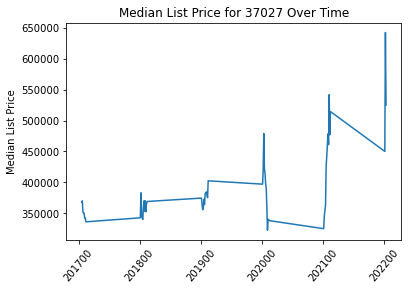

In [58]:
plt.plot(zip_37027.month_date_yyyymm, zip_37027.median_listing_price)
plt.ylabel('Median List Price') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Median List Price for 37027 Over Time');

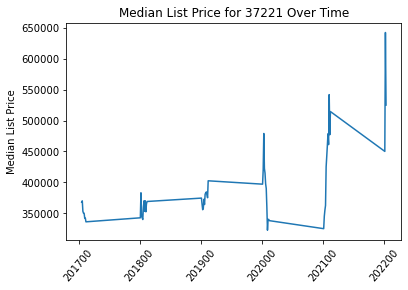

In [59]:
plt.plot(zip_37221.month_date_yyyymm, zip_37221.median_listing_price)
plt.ylabel('Median List Price') # Number of Streams times 10^9
plt.xticks(rotation = 50)
plt.title('Median List Price for 37221 Over Time');

In [23]:
#inventory_core_zips = inventory_core.loc[inventory_core['postal_code'] == 37027]
#inventory_core_zips

In [40]:
inventory_core.month_date_yyyymm.unique()

array([202203, 202202, 202201, 202112, 202111, 202110, 202109, 202108,
       202107, 202106, 202105, 202104, 202103, 202102, 202101, 202012,
       202011, 202010, 202009, 202008, 202007, 202006, 202005, 202004,
       202003, 202002, 202001, 201912, 201911, 201910, 201909, 201908,
       201907, 201906, 201905, 201904, 201903, 201902, 201901, 201812,
       201811, 201810, 201809, 201808, 201807, 201806, 201805, 201804,
       201803, 201802, 201801, 201712, 201711, 201710, 201709, 201708,
       201707, 201706, 201705, 201704, 201703, 201702, 201701, 201612,
       201611, 201610, 201609, 201608, 201607], dtype=int64)

In [41]:
time_periods = [202203, 202202, 202201, 202112, 202111, 202110, 202109, 202108,
       202107, 202106, 202105, 202104, 202103, 202102, 202101, 202012,
       202011, 202010, 202009, 202008, 202007, 202006, 202005, 202004,
       202003, 202002, 202001, 201912, 201911, 201910, 201909, 201908,
       201907, 201906, 201905, 201904, 201903, 201902, 201901]
time_period_core_zips = core_zips.loc[core_zips['month_date_yyyymm'].isin(time_periods)]
time_period_core_zips

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
1790,202203,37072,"goodlettsville, tn",614450.0,0.1224,0.9642,12.0,-0.0769,-0.5556,13.0,...,767000.0,0.3083,0.7541,32.0,0.0667,-0.4074,1.5833,0.2756,0.5833,1.0
1801,202203,37217,"nashville, tn",309450.0,0.2358,0.1465,33.0,0.1786,0.2222,26.0,...,314577.0,0.0424,0.1240,88.0,0.2571,0.4915,1.5152,0.0509,0.3300,1.0
2919,202203,37220,"nashville, tn",1595000.0,0.0000,0.1193,2.0,1.0000,-0.8462,61.0,...,1227067.0,0.1468,-0.3524,2.0,0.0000,-0.9231,0.0000,-1.0000,-1.0769,1.0
4671,202203,37214,"nashville, tn",364900.0,0.1677,0.1679,12.0,0.5000,-0.4783,4.0,...,358377.0,-0.0316,0.0050,29.0,0.0741,-0.5167,1.4167,-0.9583,-0.1051,1.0
4677,202203,37218,"nashville, tn",447403.0,-0.0469,0.4550,8.0,-0.3846,-0.5294,20.0,...,476435.0,0.0156,0.5122,79.0,0.0128,1.0256,8.7500,3.7500,7.2794,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089677,201901,37210,"nashville, tn",334650.0,-0.0436,-0.0689,48.0,-0.0769,-0.1579,72.0,...,420712.0,-0.0771,-0.0547,59.0,-0.1324,-0.1061,0.2708,0.0016,0.1129,0.0
1090526,201901,37211,"nashville, tn",281200.0,-0.0046,-0.0809,146.0,-0.1751,0.4038,56.0,...,311049.0,-0.0013,-0.0497,213.0,-0.1050,0.3922,0.4863,0.1247,0.0248,1.0
1093226,201901,37072,"goodlettsville, tn",349900.0,-0.0003,-0.0227,89.0,-0.0632,0.3906,51.0,...,399216.0,-0.0794,0.0816,113.0,-0.0813,0.1895,0.2809,-0.0033,-0.2191,1.0
1096596,201901,37138,"old hickory, tn",274900.0,-0.0004,-0.0834,113.0,-0.0088,0.7121,50.0,...,327608.0,-0.0139,-0.0723,140.0,-0.0667,0.6471,0.2389,-0.0330,-0.0489,1.0


In [53]:
time_period_core_zips.plot(x='Answer', y=['Percent_2020', 'Percent_2021', 'Percent_2022'], kind='line')
plt.title('Calls Answered Over Time by Year')
plt.ylabel('Percentage of Calls')
plt.xlabel('')
plt.xticks(rotation=60)
plt.gcf().set_size_inches(15, 6)  
plt.show();

KeyError: "None of [Index([(1999000.0, 2299925.0, 2499950.0, 1971225.0, 1624950.0, 1300000.0, 1602450.0, 1524950.0, 1499450.0, 1424500.0, 1265000.0, 1497000.0, 1337500.0, 1448450.0, 1395000.0, 1314450.0, 1270000.0, 1199000.0, 1117000.0, 1049900.0, 1049900.0, 1099500.0, 1179000.0, 1180500.0, 1297400.0, 1250000.0, 1198513.0, 1150000.0, 994900.0, 950000.0, 917450.0, 897099.0, 899000.0, 949000.0, 974967.0, 958150.0, 924129.0, 897500.0, 884450.0, 899900.0, 864950.0, 866992.0, 879900.0, 874000.0, 879450.0, 899000.0, 942133.0, 947133.0, 915924.0, 890887.0, 884950.0, 882774.0, 865825.0, 850000.0, 859900.0, 879795.0, 874900.0, 898000.0, 937400.0, 784900.0, 779900.0, 776950.0)], dtype='object')] are in the [columns]"